In [1]:
from ngsolve import *
from ngsolve.meshes import Make1DMesh
from ngsolve.webgui import Draw
import numpy as np
import math

In [2]:
mesh = Make1DMesh(40, mapping=None, periodic=False)
# uniform distributed load
q = 0.4
# Draw(mesh)

In [3]:
w = H1(mesh, order=2, dirichlet="left|right")
sigma = H1(mesh, order=2, dirichlet=" ")
mu = NumberSpace(mesh)
fesm = w*sigma*mu
print ("ndof =", fesm.ndof)

ndof = 163


In [4]:
w, sigma, mu = fesm.TrialFunction()
v , tau, lamda = fesm.TestFunction()

In [5]:
a = BilinearForm(fesm)
a += (grad(sigma)*grad(v) - grad(w)*grad(v) + 1/2*grad(w)*grad(v)*mu + sigma*tau \
       + grad(w)*grad(tau) + mu*lamda - grad(w)**2*lamda )*dx

f = LinearForm(fesm)
f += -q*v*dx
    
gfsol = GridFunction(fesm)
    
a.Assemble()
f.Assemble()
gfsol.vec.data = a.mat.Inverse(fesm.FreeDofs(),inverse="umfpack")*f.vec
gfw, gfsigma, gfmu = gfsol.components

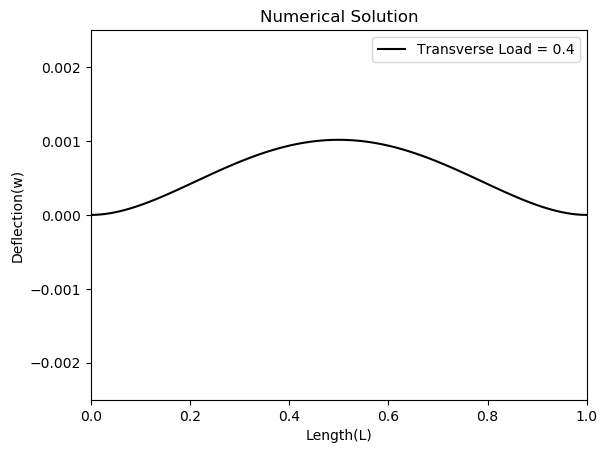

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,1,100)
gfw(mesh(x))

plt.plot(x,gfw(mesh(x)),color='black',label='Transverse Load = 0.4',linestyle="-")
plt.ylim([-0.0025, 0.0025])
plt.xlim([0, 1.0])
plt.title("Numerical Solution")
plt.xlabel("Length(L)")
plt.ylabel("Deflection(w)")
plt.legend()